In [349]:
from itertools import combinations

import matplotlib.pyplot as plt
from pandas import read_csv, MultiIndex, DataFrame
from seaborn import heatmap, regplot
from tabulate import tabulate

data = read_csv("data.csv",
                   header=None,
                   names=["plec", "dlugosc", "srednica", "wysokosc",
                          "masa_calkowita", "masa_po_wyjeciu",
                          "masa_trzewi_obrzydliwe", "masa_muszli", "pierscienie"])

p_data = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]

def percent(number):
    return round(number * 100, 2)

def print_table(table):
    print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

# Ocena dostateczna 1

In [350]:
print_table({'': data.groupby("plec").groups,
 'count': data.groupby("plec").size(),
 '%': [percent(i / len(data)) for i in data.groupby('plec').size()]
 })

╒════╤═════════╤═══════╕
│    │   count │     % │
╞════╪═════════╪═══════╡
│ F  │    1307 │ 31.29 │
├────┼─────────┼───────┤
│ I  │    1342 │ 32.13 │
├────┼─────────┼───────┤
│ M  │    1528 │ 36.58 │
╘════╧═════════╧═══════╛


# Ocena dostateczna 2

In [351]:
# print_table(p_data.describe().drop("count").transpose()) # xD
print_table({
    '': p_data.columns,
    'mean': [p_data[column].mean() for column in p_data.columns],
    'std': [p_data[column].std() for column in p_data.columns],
    'min': [p_data[column].min() for column in p_data.columns],
    '25%': [p_data[column].quantile(0.25) for column in p_data.columns],
    '50%': [p_data[column].quantile(0.5) for column in p_data.columns],
    '75%': [p_data[column].quantile(0.75) for column in p_data.columns],
    'max': [p_data[column].max() for column in p_data.columns]
    })

╒════════════════════════╤══════════╤═══════════╤════════╤════════╤════════╤════════╤═════════╕
│                        │     mean │       std │    min │    25% │    50% │    75% │     max │
╞════════════════════════╪══════════╪═══════════╪════════╪════════╪════════╪════════╪═════════╡
│ dlugosc                │ 0.523992 │ 0.120093  │ 0.075  │ 0.45   │ 0.545  │  0.615 │  0.815  │
├────────────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ srednica               │ 0.407881 │ 0.0992399 │ 0.055  │ 0.35   │ 0.425  │  0.48  │  0.65   │
├────────────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ wysokosc               │ 0.139516 │ 0.0418271 │ 0      │ 0.115  │ 0.14   │  0.165 │  1.13   │
├────────────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ masa_calkowita         │ 0.828742 │ 0.490389  │ 0.002  │ 0.4415 │ 0.7995 │  1.153 │  2.8255 │
├────────────────────────┼──────────┼───

# Ocena dostateczna 3

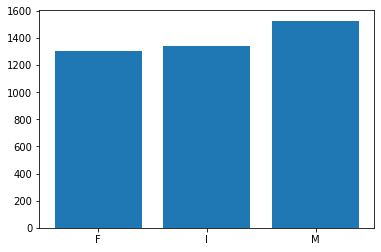

In [352]:
plt.bar([1, 2, 3], data.groupby("plec").size())
plt.xticks([1, 2, 3], data.groupby("plec").groups)
plt.show()

# Ocena dostateczna 4

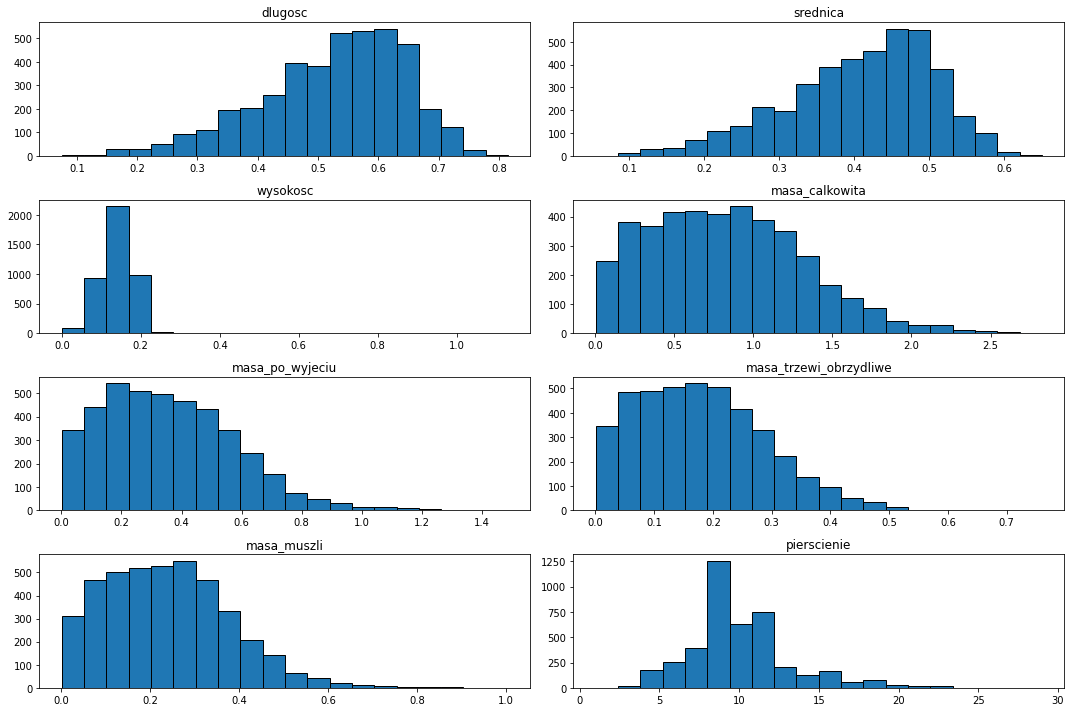

In [353]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
for column_name in data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]:
    plot = fig.add_subplot(4, 2, data.columns.get_loc(column_name), title=column_name)
    plot.hist(data[column_name], bins=20, edgecolor="black")

plt.tight_layout()
plt.show()

# Ocena dobra 2

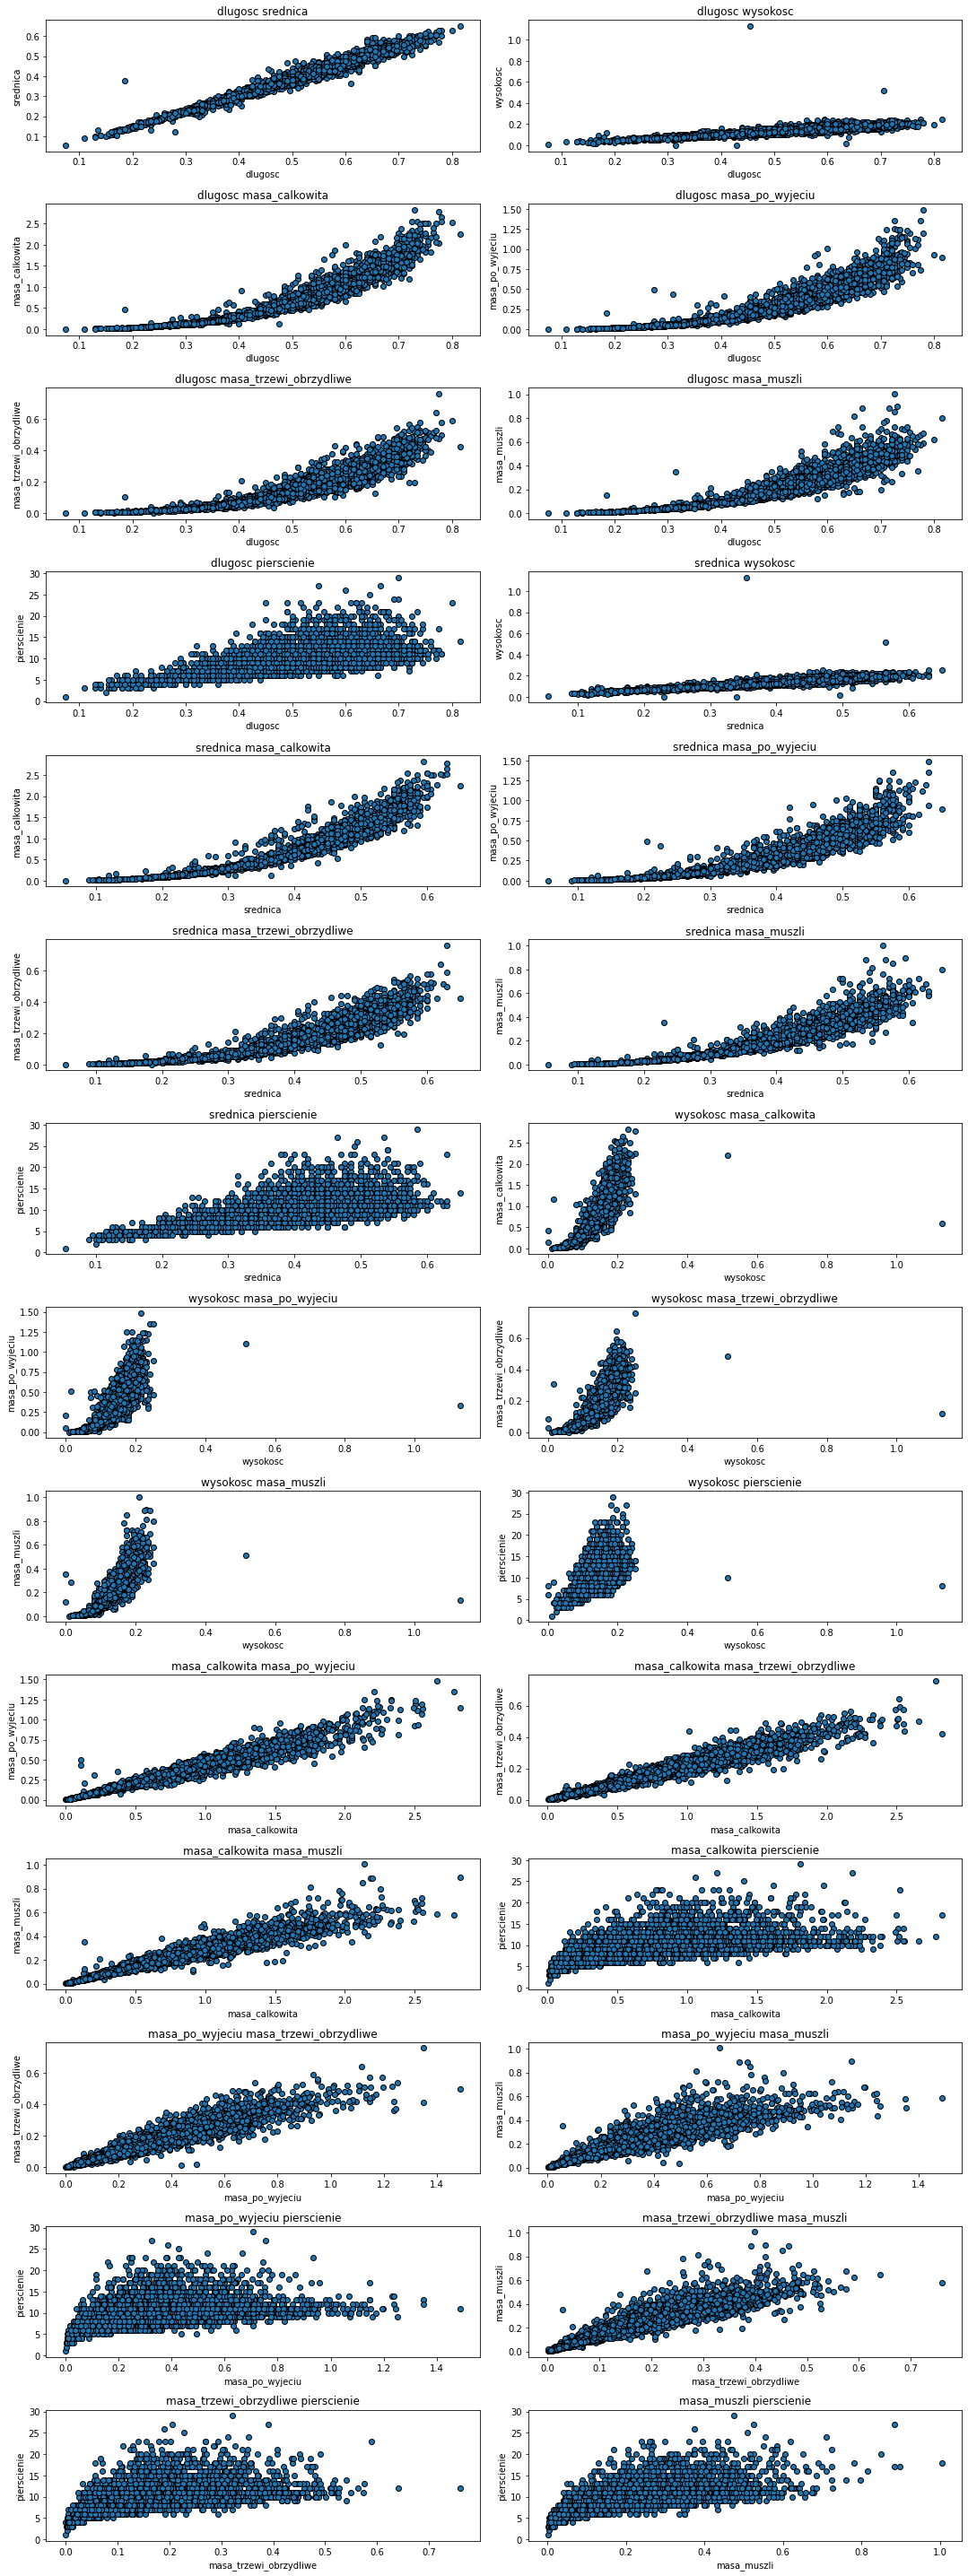

In [354]:
fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(15)
pairs = list(combinations(data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]], 2))
for i in range(len(pairs)):
    plot = fig.add_subplot(14, 2, (i + 1), title=pairs[i][0] + " " + pairs[i][1])
    plot.scatter(data[pairs[i][0]], data[pairs[i][1]], edgecolor="black")
    plot.set_xlabel(pairs[i][0])
    plot.set_ylabel(pairs[i][1])

plt.tight_layout()
plt.show()

# Ocena dobra 3

╒════════════════════════╤═══════════╤════════════╤════════════╤══════════════════╤═══════════════════╤══════════════════════════╤═══════════════╤═══════════════╕
│                        │   dlugosc │   srednica │   wysokosc │   masa_calkowita │   masa_po_wyjeciu │   masa_trzewi_obrzydliwe │   masa_muszli │   pierscienie │
╞════════════════════════╪═══════════╪════════════╪════════════╪══════════════════╪═══════════════════╪══════════════════════════╪═══════════════╪═══════════════╡
│ dlugosc                │  1        │   0.986812 │   0.827554 │         0.925261 │          0.897914 │                 0.903018 │      0.897706 │      0.55672  │
├────────────────────────┼───────────┼────────────┼────────────┼──────────────────┼───────────────────┼──────────────────────────┼───────────────┼───────────────┤
│ srednica               │  0.986812 │   1        │   0.833684 │         0.925452 │          0.893162 │                 0.899724 │      0.90533  │      0.57466  │
├─────────────────────

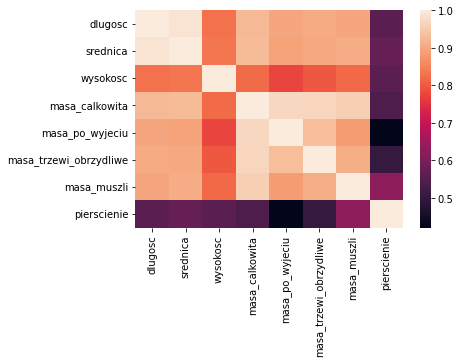

In [355]:
heatmap(p_data.corr())
print_table(p_data.corr())

# Ocena dobra 4

╒════════════════════════╤═══════════╤════════════╤════════════╤══════════════════╤═══════════════════╤══════════════════════════╤═══════════════╤═══════════════╕
│                        │   dlugosc │   srednica │   wysokosc │   masa_calkowita │   masa_po_wyjeciu │   masa_trzewi_obrzydliwe │   masa_muszli │   pierscienie │
╞════════════════════════╪═══════════╪════════════╪════════════╪══════════════════╪═══════════════════╪══════════════════════════╪═══════════════╪═══════════════╡
│ dlugosc                │  1        │   0.986812 │   0.827554 │         0.925261 │          0.897914 │                 0.903018 │      0.897706 │      0.55672  │
├────────────────────────┼───────────┼────────────┼────────────┼──────────────────┼───────────────────┼──────────────────────────┼───────────────┼───────────────┤
│ srednica               │  0.986812 │   1        │   0.833684 │         0.925452 │          0.893162 │                 0.899724 │      0.90533  │      0.57466  │
├─────────────────────

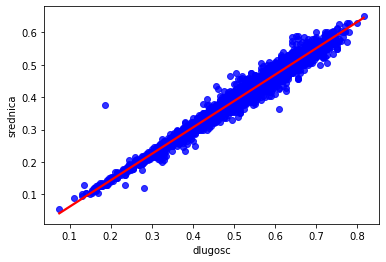

In [356]:
regplot(x=data.columns[1], y=data.columns[2],  data=data.iloc[:, [1, 2]], color='b', line_kws={'color': 'r'})
print_table(p_data.corr())

# Ocena bardzo dobra 2

In [357]:
index = MultiIndex.from_product([p_data.columns, ["f", "i", "m"]])
data = data.groupby("plec").describe().unstack().transpose().values
gowno = DataFrame(data, index=index)
print(gowno)
# print_table(gowno)

# print_table(DataFrame([
#     data.groupby("plec").mean().unstack(),
#      data.groupby("plec").std(),
#      data.groupby("plec").min().unstack(),
#      data.groupby("plec").quantile(0.25).unstack(),
#      data.groupby("plec").quantile(0.5).unstack(),
#      data.groupby("plec").quantile(0.75).unstack(),
#      data.groupby("plec").max().unstack()
# ]).transpose().values)

# print_table({
#     '': p_data.columns,
#     'mean':data.groupby("plec").mean().unstack().transpose(),
#     'std': data.groupby("plec").std().transpose(),
#     'min': data.groupby("plec").min().unstack().transpose(),
#     '25%': data.groupby("plec").quantile(0.25).unstack().transpose(),
#     '50%': data.groupby("plec").quantile(0.5).unstack().transpose(),
#     '75%': data.groupby("plec").quantile(0.75).unstack().transpose(),
#     'max': data.groupby("plec").max().unstack().transpose()
#     })
# print_table({
#     '': p_data.columns,
#     'mean':[data.groupby("plec").mean().unstack()[column] for column in p_data.columns],
#     'std': [data.groupby("plec").std()[column] for column in p_data.columns],
#     'min': [data.groupby("plec").min().unstack()[column] for column in p_data.columns],
#     '25%': [data.groupby("plec").quantile(0.25).unstack()[column] for column in p_data.columns],
#     '50%': [data.groupby("plec").quantile(0.5).unstack()[column] for column in p_data.columns],
#     '75%': [data.groupby("plec").quantile(0.75).unstack()[column] for column in p_data.columns],
#     'max': [data.groupby("plec").max().unstack()[column] for column in p_data.columns]
#     })



ValueError: Shape of passed values is (192, 1), indices imply (24, 1)